In [1]:
#just practicing collecting tweets Friday and making an xkcd chart

import tweepy
import sys
import cnfg
import pymongo
import pandas as pd
import dateutil.parser
import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pickle
from PIL import Image
import time
import re
from sklearn.metrics import accuracy_score
from collections import defaultdict
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
#Steps 1 and 2:

#--OAuth Authentication--aka getting permission to make API calls#
#creating an OAuthHandler instance
config = cnfg.load(".twitter_config")

auth = tweepy.OAuthHandler(config["consumer_key"],
                           config["consumer_secret"])
auth.set_access_token(config["access_token"],
                      config["access_token_secret"])

api = tweepy.API(auth)

#print out the name of the account as a test.
print api.me().name

yong cho


In [3]:
class CustomStreamListener2(tweepy.StreamListener):
    def __init__(self):
        self.api = api
        super(tweepy.StreamListener, self).__init__()
        
        self.db = pymongo.MongoClient().Cubs
        
    def on_connect(self):
        #Called when the connection is made
        print("Connected to the streaming server.")
    
    def on_status(self, status):
        
        data = defaultdict(list)
        
        data['text'] = status.text
        data['created_at'] = status.created_at
        data['geo'] = status.geo
        data['source'] = status.source
        
        data['user'] = status.user.screen_name
        
        if status.entities['hashtags']:
            for hashtag in status.entities['hashtags']:
                data['hashtag'].append(hashtag['text'])
        else:
            data['hashtag'] = None

#         print status.text, '\n'
        
        self.db.FriTweets.insert(data)

    def on_error(self, status_code):
        print >> sys.stderr, 'Encountered error with status code:', status_code
        time.sleep(5)
        return True # Don't kill the stream

    def on_timeout(self):
        print >> sys.stderr, 'Timeout...'
        return True # Don't kill the stream

In [5]:
# while True:
#     try:
#         sapi2 = tweepy.streaming.Stream(auth, CustomStreamListener2())
#         sapi2.filter(track=['cubs'])
#     except Exception as e:
#         print "Had an error,", e
#         pass

In [7]:
# tweets = pymongo.MongoClient().Cubs.FriTweets
# cursor = tweets.find()
# cubsDF = pd.DataFrame(list(cursor))
# print len(cubsDF)

In [9]:
cleanDF = cubsDF[['created_at','text','hashtag','user','geo','source']]
cleanDF.head()

,created_at,text,hashtag,user,geo,source
0,2015-08-14 20:10:10,"Los @Braves, anunciaron esta tarde la contrata...","[EdwinJackson, Chicago]",PedroAlejo,None,Twitter Web Client
1,2015-08-14 20:10:11,Last Second OutBid RT↺ http://t.co/OM0hYFuGwu ...,None,YoubidderMe,None,Lisa K
2,2015-08-14 20:10:12,RT Cubs: ZC4Life__ Thanks for cheering on the ...,"[Cubs, Cubs, ChicagoCubs, MLB]",fanschicagocubs,None,IFTTT
3,2015-08-14 20:10:12,RT Cubs: TheXboxPrincess Traffic? Must be traf...,"[Cubs, ChicagoCubs, MLB]",fanschicagocubs,None,IFTTT
4,2015-08-14 20:10:12,RT Cubs: mrcub63 TheCubsFeed You're very good ...,"[Cubs, ChicagoCubs, MLB]",fanschicagocubs,None,IFTTT


In [10]:
cleanDF['created_at'] = pd.to_datetime(pd.Series(cleanDF['created_at']))
cleanDF.set_index('created_at', drop=False, inplace=True)
cleanDF.head()

/Users/yongcho822/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,created_at,text,hashtag,user,geo,source
created_at,,,,,,
2015-08-14 20:10:10,2015-08-14 20:10:10,"Los @Braves, anunciaron esta tarde la contrata...","[EdwinJackson, Chicago]",PedroAlejo,None,Twitter Web Client
2015-08-14 20:10:11,2015-08-14 20:10:11,Last Second OutBid RT↺ http://t.co/OM0hYFuGwu ...,None,YoubidderMe,None,Lisa K
2015-08-14 20:10:12,2015-08-14 20:10:12,RT Cubs: ZC4Life__ Thanks for cheering on the ...,"[Cubs, Cubs, ChicagoCubs, MLB]",fanschicagocubs,None,IFTTT
2015-08-14 20:10:12,2015-08-14 20:10:12,RT Cubs: TheXboxPrincess Traffic? Must be traf...,"[Cubs, ChicagoCubs, MLB]",fanschicagocubs,None,IFTTT
2015-08-14 20:10:12,2015-08-14 20:10:12,RT Cubs: mrcub63 TheCubsFeed You're very good ...,"[Cubs, ChicagoCubs, MLB]",fanschicagocubs,None,IFTTT


In [11]:
import pytz
eastern = pytz.timezone('US/Eastern')
cleanDF.index = cleanDF.index.tz_localize('GMT').tz_convert(eastern)

In [12]:
cleanDF.head()

,created_at,text,hashtag,user,geo,source
created_at,,,,,,
2015-08-14 16:10:10-04:00,2015-08-14 20:10:10,"Los @Braves, anunciaron esta tarde la contrata...","[EdwinJackson, Chicago]",PedroAlejo,None,Twitter Web Client
2015-08-14 16:10:11-04:00,2015-08-14 20:10:11,Last Second OutBid RT↺ http://t.co/OM0hYFuGwu ...,None,YoubidderMe,None,Lisa K
2015-08-14 16:10:12-04:00,2015-08-14 20:10:12,RT Cubs: ZC4Life__ Thanks for cheering on the ...,"[Cubs, Cubs, ChicagoCubs, MLB]",fanschicagocubs,None,IFTTT
2015-08-14 16:10:12-04:00,2015-08-14 20:10:12,RT Cubs: TheXboxPrincess Traffic? Must be traf...,"[Cubs, ChicagoCubs, MLB]",fanschicagocubs,None,IFTTT
2015-08-14 16:10:12-04:00,2015-08-14 20:10:12,RT Cubs: mrcub63 TheCubsFeed You're very good ...,"[Cubs, ChicagoCubs, MLB]",fanschicagocubs,None,IFTTT


In [13]:
cubs1m = cleanDF['created_at'].resample('1t', how='count')
cubs1m.index = map(lambda x:x.strftime('%I:%M %p'), cubs1m.index)

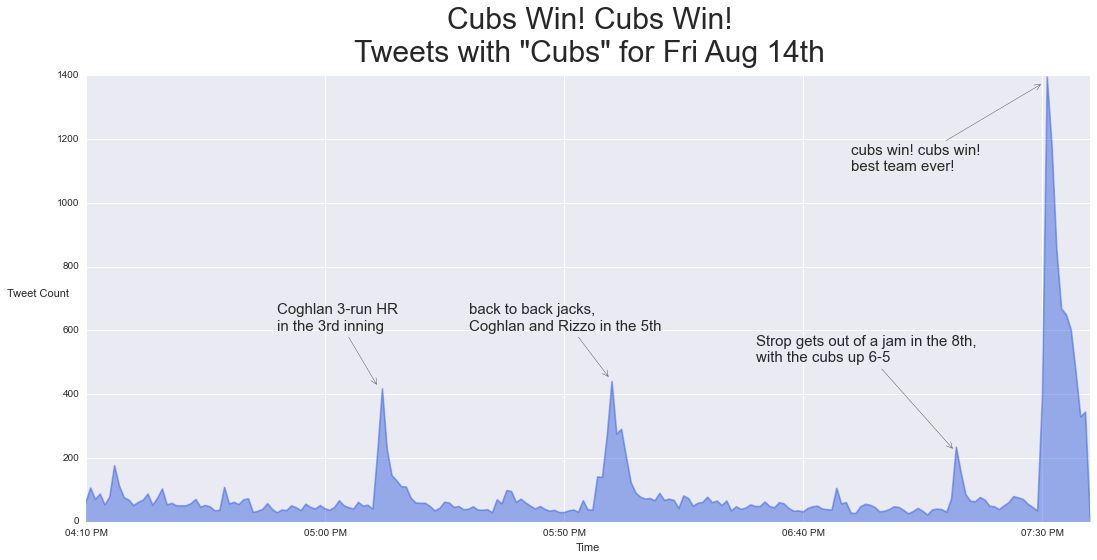

In [53]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1, 1, 1)
cubs1m.plot(kind='area', color='royalblue', alpha=0.5)
plt.title("Cubs Win! Cubs Win!\nTweets with \"Cubs\" for Fri Aug 14th", fontsize = 30, y=1.02)
plt.ylabel("Tweet Count", labelpad=20).set_rotation(0)
plt.xlabel("Time")
plt.annotate(
    'cubs win! cubs win!\nbest team ever!',
    xy=(200, 1375), arrowprops=dict(arrowstyle='->'), xytext=(160, 1100), fontsize = 15)
plt.annotate(
    'Coghlan 3-run HR\nin the 3rd inning',
    xy=(61, 425), arrowprops=dict(arrowstyle='->'), xytext=(40, 600), fontsize = 15)
plt.annotate(
    'back to back jacks,\nCoghlan and Rizzo in the 5th',
    xy=(109.5, 450), arrowprops=dict(arrowstyle='->'), xytext=(80, 600), fontsize = 15)
plt.annotate(
    'Strop gets out of a jam in the 8th,\nwith the cubs up 6-5',
    xy=(181.5, 225), arrowprops=dict(arrowstyle='->'), xytext=(140, 500), fontsize = 15)

In [112]:
cubs1m = cubs1m * 100

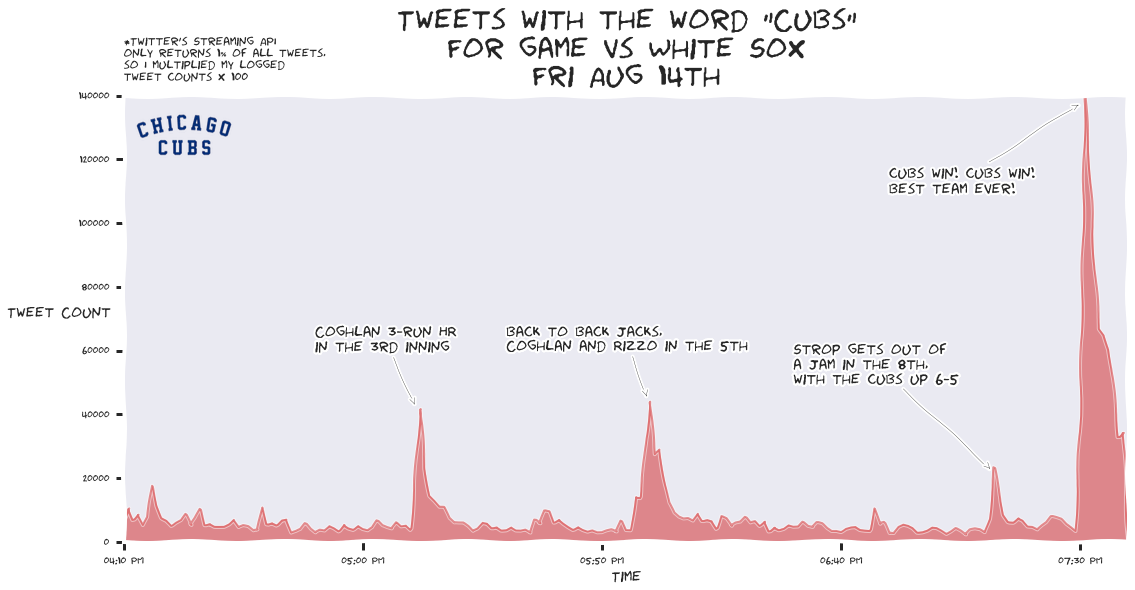

In [128]:
sns.set_style("dark")

plt.xkcd()

im = Image.open('Chicago_Cubs_logo_1917.png')

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1, 1, 1)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
fig.figimage(im, 135, 430, zorder = 50)
cubs1m.plot(kind='area', color='#D12325', alpha=0.5)
plt.title("Tweets with the word \"Cubs\"\nFor game vs White Sox\nFri Aug 14th", fontsize = 30, y=1.02)
plt.ylabel("Tweet Count", labelpad=20, fontsize = 15).set_rotation(0)
plt.xlabel("Time", fontsize = 15)
plt.annotate(
    'cubs win! cubs win!\nbest team ever!',
    xy=(200, 137500), arrowprops=dict(arrowstyle='->'), xytext=(160, 110000), fontsize = 15)
plt.annotate(
    'Coghlan 3-run HR\nin the 3rd inning',
    xy=(61, 42500), arrowprops=dict(arrowstyle='->'), xytext=(40, 60000), fontsize = 15)
plt.annotate(
    'back to back jacks,\nCoghlan and Rizzo in the 5th',
    xy=(109.5, 45000), arrowprops=dict(arrowstyle='->'), xytext=(80, 60000), fontsize = 15)
plt.annotate(
    'Strop gets out of\na jam in the 8th,\nwith the cubs up 6-5',
    xy=(181.5, 22500), arrowprops=dict(arrowstyle='->'), xytext=(140, 50000), fontsize = 15)
plt.text(0, 145000,'*Twitter\'s Streaming API\nonly returns 1% of all tweets,\nso I multiplied my logged\ntweet counts x 100', fontsize = 12)